<a href="https://colab.research.google.com/github/jdarguello/Ciclo2_Java/blob/master/HerenciaJava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
  <h1><strong>Herencia</strong></h1>
  <strong>Hecho por:</strong> Juan David Argüello Plata
</div>


## __Introducción__

<div align="justify">

La relación de herencia facilita la reutilización de código brindando una base de programación para el desarrollo de nuevas clases. 

</div>

---

_Nota:_ __ejecuta__ este primer bloque de código antes de utilizar el material interactivo, luego debes recargar la página &#8635; para poder usarlo sin problema.

In [ ]:
!wget https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip
!unzip ijava-1.3.0.zip
!python install.py --sys-prefix

## __1. Sobrecarga de métodos y constructores__

En Java, es posible abordar múltiples posibilidades durante la creación de un objeto. Esto se puede lograr a través del número de entradas que tengan los métodos. Por ejemplo: en una calculadora, es posible sumar dos o tres números.

In [ ]:
class Calculadora {
  public int suma (int x, int y) {
    return x+y;
  }
  public int suma (int x, int y, int z) {
    return x+y+z;
  }
}

Calculadora calc = new Calculadora();

System.out.println("Suma de dos números: " + calc.suma(5,10));

System.out.println("Suma de tres números: " + calc.suma(5,10,4));

El constructor es un método que permite realizar un desarrollo particular en el momento en que se crea un objeto. También es posible sobrecargar el constructor de una clase dependiendo de las entradas que ingresa un usuario.

In [ ]:
class Persona {
  private String nombre;
  private int cedula;

  public Persona() {
    System.out.println("Se creó una persona desconocida");
  }
  public Persona(String nombre) {
    this.nombre = nombre;
    System.out.println("Se creó a " + nombre);
  }
  public Persona (int cedula) {
    this.cedula = cedula;
    System.out.println("La persona está identificada por C.C." + this.cedula);
  }
  public Persona (String nombre, int cedula) {
    this.nombre = nombre;
    this.cedula = cedula;
    System.out.println("Se creó a " + nombre + " con C.C." + cedula);
  }
}

In [ ]:
//Sin argumentos de entrada...
Persona juan = new Persona();

In [ ]:
//Sólo el nombre
Persona juan = new Persona("Juan");

In [ ]:
//Sólo la cédula
Persona juan = new Persona(1098);

In [ ]:
//Toda la información solicitada
Persona juan = new Persona("Juan", 1098);

## __2. Superclase y subclases__

En la relación de herencia entre dos clases, se cataloga a las clases como _padre_ e _hija_. La clase hija (subclase) _hereda_ los __métodos__ y __atributos__ de la clase padre. Las subclases (clases hijas) emplean el siguiente formato:

```
  class clase_hija extends clase_padre {
    //Atributos
    ...

    //Métodos
    ...
  }
```

La clase padre suele usarse como un formato para la construcción de clases hijas. Un ejemplo de ello es la _calculadora científica_, que se puede catalogar como una subclase de la calculadora convencional.

In [ ]:
//Calculadora convencional
class Calculadora {
  public double suma (double x, double y) {
    return x+y;
  }
  public double resta (double x, double y) {
    return x-y;
  }
  public double mult (double x, double y) {
    return x*y;
  }
  public double div (double x, double y) {
    return x/y;
  }
}

Además de las operaciones básicas, la clase de `Calculadora_cientifica` debería poder calcular el promedio de una lista numérica y la desviación estándar.

---

<div align="center">

<strong>Promedio</strong>

$$
\begin{equation}
  \bar{x} = \frac{\sum _{i=0} ^n x_i}{n}
\end{equation}
$$

<strong>Desviación estándar</strong>

$$
\begin{equation}
  s = \sqrt{ \frac{\sum _{i=0} ^n \left( x_i - \bar{x} \right)}{n-1} }
\end{equation}
$$

</div>

In [ ]:
//Calculadora científica
import java.lang.Math;

class Calculadora_cientifica extends Calculadora {
  public double promedio (double[] numeros) {
    double promedio = 0;
    for (double num: numeros) {
      promedio += num;
    }
    return promedio/numeros.length;
  }

  public double desvest (double[] numeros) {
    double promedio = this.promedio(numeros);
    double des = 0;
    for (double num: numeros) {
      des += Math.pow(num-promedio,2);
    }
    des /= (numeros.length-1);
    return Math.sqrt(des);
  }
}

__Observa__ que al momento de crear un objeto del tipo `Calculadora_cientifica` es posible utilizar los métodos heredados de la clase `Calculadora`.

In [ ]:
Calculadora_cientifica calc1 = new Calculadora_cientifica();

System.out.println("2+3 = " + calc1.suma(2,3));

System.out.println("Promedio de: [2,3,10] = " + calc1.promedio(new double[] {2,3,10}));

System.out.println("Desviación estándar de: [2,3,10] = " + calc1.desvest(new double[] {2,3,10}));

En Java, durante la relación de herencia __sólo__ puede haber una clase padre y, de ella, es posible derivar múltiples hijas.

## 2.1. Operadores __`this`__ y __`super`__

<div align="justify">

El operador `this` se refiere a la clase _per se_. Se emplea dentro de la clase para especificar el uso de sus métodos y atributos. El operador `super` se emplea en una relación de herencia para referirse explícitamente a los métodos y atributos de la clase padre. Es decir: en una relación de herencia, se emplea `this` para referirse a los métodos y atributos de la subclase (clase _hija_) y `super` para los métodos y atributos de la superclase (clase _padre_).

</div>

### 2.1.1 Constructores

Tanto la superclase como las subclases pueden tener sus propios constructores. Si la superclase tiene un constructor, la sublcase  debe emplear el operador `super` para ejecutarlo. 

Por ejemplo, supongamos la situación de un estudiante. Se puede asumir que la clase de `Student` deriva de la clase `Person`, como se aprecia en el diagrama UML.

<div align="center">

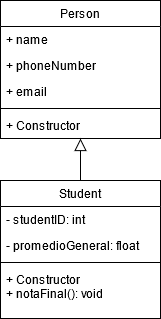

</div>

In [ ]:
class Person {
  public String name;
  public int phoneNumber;
  public String email;

  public Person(String nombre, int numero, String mail) {
    name = nombre;
    phoneNumber = numero;
    email = mail;
    System.out.println(name + " - " + phoneNumber + " - " + email);
  }
}

class Student extends Person {
  private int studentID;
  private float promedioGeneral;

  public Student(String nombre, int telefono, String email, int studentID) {
    super(nombre, telefono, email);
    this.studentID = studentID;
  }
}

//---------------------------------Creación de personas y estudiantes------------------

Student john = new Student("John Pérez", 302010, "john@gmail.com", 10010);

En ese contexto, el operador `super` se refiere explícitamente a la superclase, mientras que el operador `this` se emplea para trabajar con los atributos y métodos de la subclase.

### Ejemplo:

Elabora una clase _padre_ `Animal` para construir clases hijas: `Oso`, `Tigre` y `Perro`. Puedes emplear el diagram UML como sugerencia.


<div align="center">
  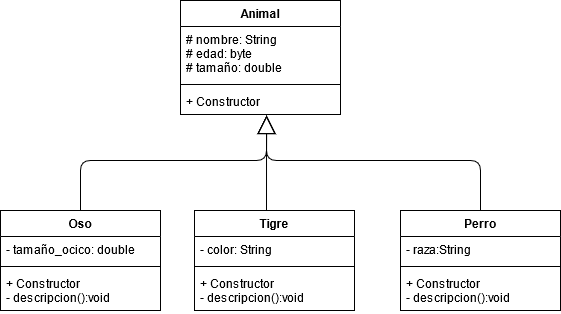
</div>


In [ ]:
//---------------------Clase padre---------------------------
class Animal {
  protected String nombre;
  protected byte edad;
  protected double tamaño;

  public Animal (String nombre, byte edad, double tamaño) {
    this.nombre = nombre;
    this.edad = edad;
    this.tamaño = tamaño;
  }
}
//------------------Clases hijas----------------------------
class Oso extends Animal {
  private double tamaño_ocico;

  public Oso(String nombre, byte edad, double tamaño, double tamaño_ocico) {
    super(nombre, edad, tamaño);
    this.tamaño_ocico = tamaño_ocico;

    this.descripcion();
  }

  private void descripcion() {
    System.out.println(nombre + " es un oso de " + edad +" años y tiene un ocico de " + tamaño_ocico + " metros.");
  }
}

class Tigre extends Animal {
  private String color;

  public Tigre(String nombre, byte edad, double tamaño, String color) {
    super(nombre, edad, tamaño);
    this.color = color;
  }
}

class Perro extends Animal {
  private String raza;

  public Perro(String nombre, byte edad, double tamaño, String raza) {
    super(nombre, edad, tamaño);
    this.raza = raza;
  }
}

//-----------------------------Ejemplos----------------------------------------

Oso oso_pardo = new Oso("Malo", (byte)3, 2.2, 0.2);



## __3. Polimorfismo__

_Polimorfismo_ se deriva de las palabras griegas "poli", que significa muchos, y "morphe", que significa formas. En programación, se emplea este concepto para cambiar el contenido de un método heredado para que se ajuste a las necesidades principales de las subclases.

Un ejemplo que podría ayudar a visualizar este concepto es el de una clase vehiculo.

In [ ]:
class Animal {
  
}

## __4. Ejercicios__

### 4.1.

### 4.3. Barco de carga

<div align="justify">

Los barcos de carga se emplean para el transporte de mercancías de diferentes zonas del planeta, en calidad tanto de importación como de exportación. Supongamos que deseas construir el _alibaba_ versión colombiana. Para ello, piensas elaborar un prototipo funcional que se encargue de la logística de la carga en un barco. Un barco está compuesto por una serie de contenedores. Supongamos que existen tres tamaños principales:

<ol>
  <li><strong>Carga <i>junior</i>:</strong> para volúmenes de carga de hasta $1[m^3]$.</li>
  <li><strong>Carga <i>media</i>:</strong> volúmenes de carga entre $1[m^3]$ y $5 [m^3]$.</li>
  <li><strong>Carga <i>pesada</i>:</strong> volúmenes de carga entre $5[m^3]$ y $10 [m^3]$.</li>
</ol>

A su vez, existen dos tipos de barcos:

<ol>
  <li><strong><i>Mini</i> buque:</strong> es capaz de transportar cinco cargas junior y una media.</li>
  <li><strong>Buque:</strong> puede transportar dos cargas pesadas, tres medias y diez junior.</li>
</ol>

Elabora un algoritmo de una plataforma de comercio electrónico internacional, de carácter marítimo, que permita hacer seguimiento de pedidos.

</div>